# Homework 4
## INF 552: Machine Learning for Data Informatics
### Jungho Choi (junghoch@usc.edu)

In [35]:
from __future__ import division
%matplotlib inline  
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

1.The LASSO and Boosting for Regression

(a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [2]:
c_df = pd.read_csv("communities.csv",header=None) # get rid of first five columns as they are non-predictive
c_df = c_df.iloc[:,5:]
c_summary_df = pd.read_csv("communities_summarystat.csv", header=None)
column_vals = c_summary_df[0]
c_df.columns = column_vals

c_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [3]:
train = c_df.iloc[:1495]
test = c_df.iloc[1495:]

(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [4]:
# using mean imputation (substituting missing, NaN, values with the mean of the variable)
from sklearn.impute import SimpleImputer 
c_df = c_df.replace('?', np.NaN)
imp = SimpleImputer(missing_values=np.NaN)
imputed_c_df = imp.fit_transform(c_df)
imputed_c_df = pd.DataFrame(imputed_c_df)
imputed_c_df.columns = column_vals

imputed_c_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


(c) Plot a correlation matrix for the features in the data set.

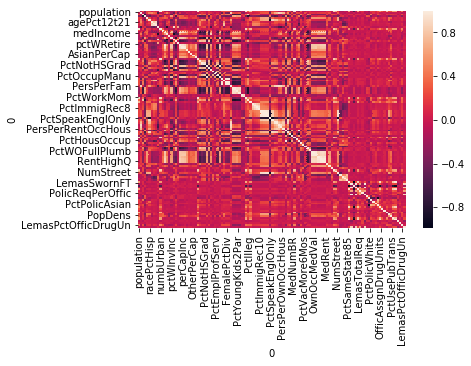

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = sns.heatmap(imputed_c_df.iloc[:,:-1].corr())
corr_matrix #can increase size to see more variables 

(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample variance and m is sample mean.

In [6]:
features = imputed_c_df.iloc[:,:-1]
features_stats = features.describe()
cv = features_stats.loc['std'] * features_stats.loc['std'] / features_stats.loc['mean'] # var = std^2
cv = pd.DataFrame(cv)
cv.columns = ['Coefficient of Variation']
cv 

,Coefficient of Variation
0,
population,0.279637
householdsize,0.057841
racepctblack,0.357587
racePctWhite,0.079015
racePctAsian,0.283898
racePctHisp,0.375306
agePct12t21,0.056777
agePct12t29,0.041733
agePct16t24,0.082446


(e) Pick floor(√128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [7]:
selected11 = cv.nlargest(int(np.floor(np.sqrt(128))), 'Coefficient of Variation')
selected11

,Coefficient of Variation
0,
LemasPctOfficDrugUn,0.614103
NumStreet,0.442534
racePctHisp,0.375306
NumInShelters,0.357634
racepctblack,0.357587
NumIlleg,0.325382
PctUsePubTrans,0.324496
PctNotSpeakEnglWell,0.320580
PctRecImmig5,0.306673


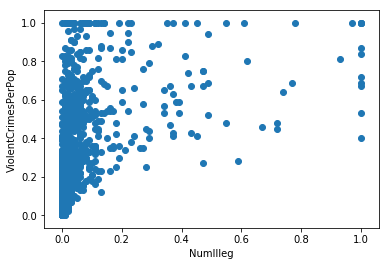

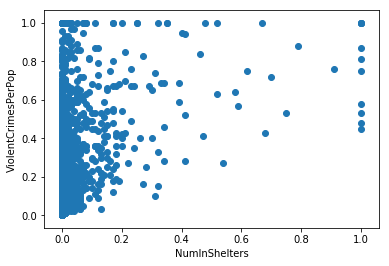

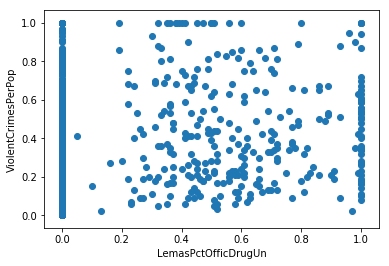

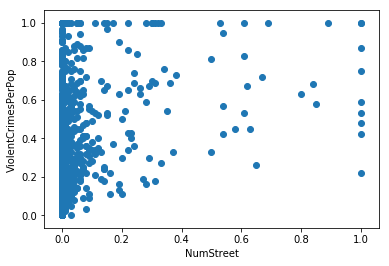

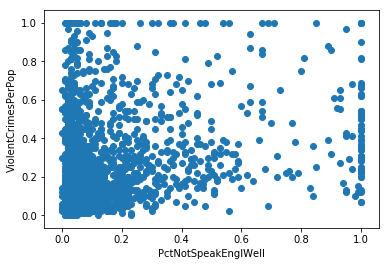

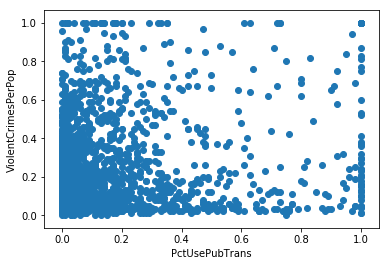

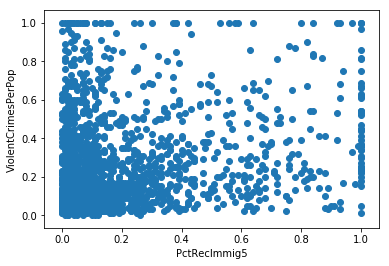

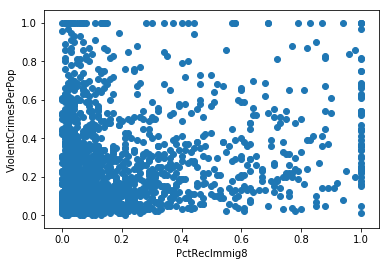

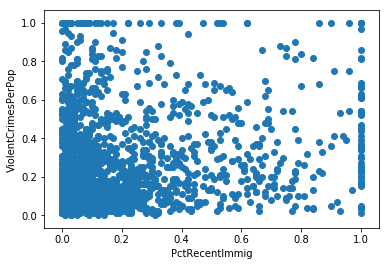

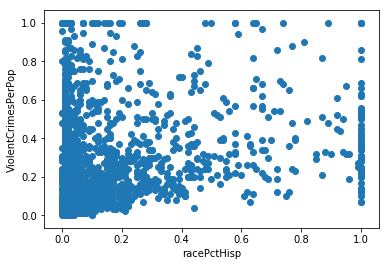

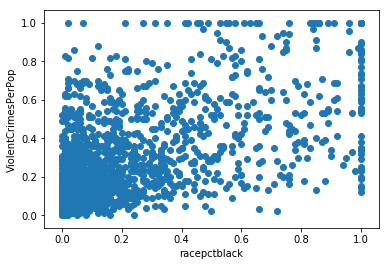

In [8]:
top11 = dict() 
for i in xrange(len(selected11)):
    top11[selected11.index[i]] = features[selected11.index[i]]

import itertools
y = imputed_c_df.iloc[:,-1]
for key, value in top11.iteritems(): 
    x = value
    plt.scatter(x, y)
    plt.xlabel(key)
    plt.ylabel('ViolentCrimesPerPop')
    plt.show() # note they are not in the order as above since it is in a dictionary, which can randomize the order

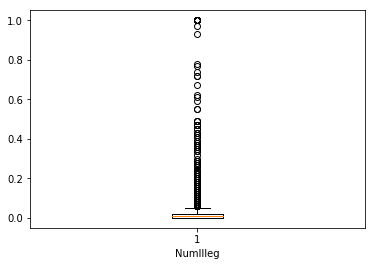

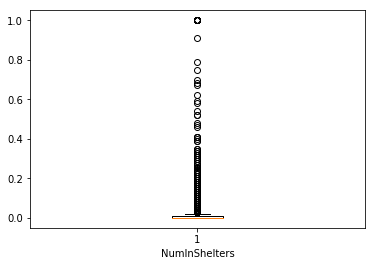

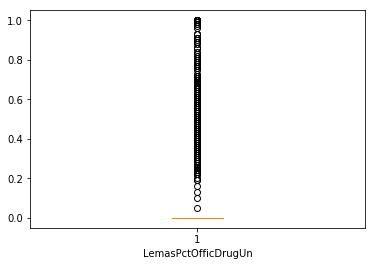

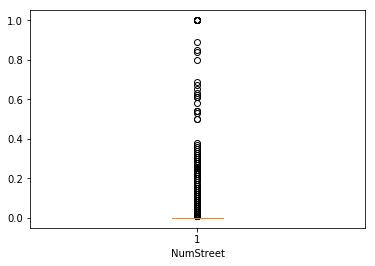

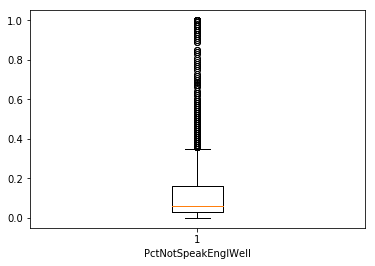

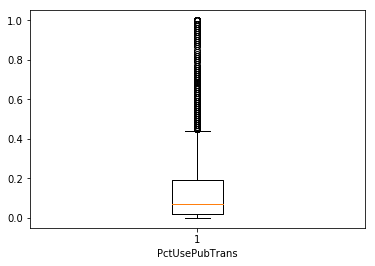

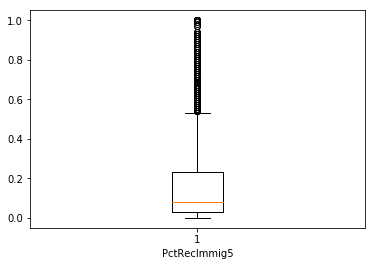

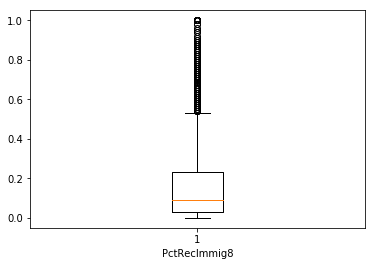

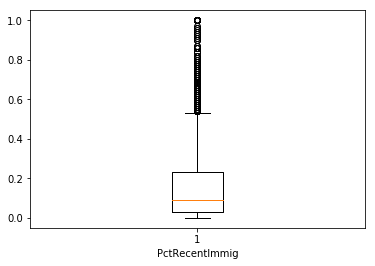

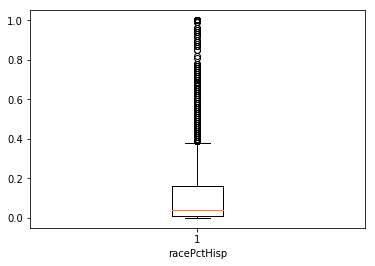

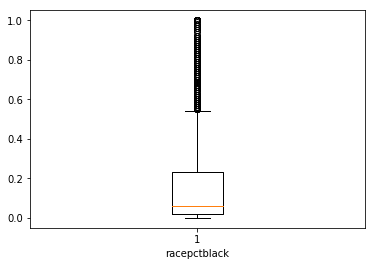

In [9]:
for key, value in top11.iteritems(): 
    x = value
    plt.boxplot(x)
    plt.xlabel(key)
    plt.show() 

- It is hard to make any conclusions about significance of the features just by examining the scatter plot

(f) Fit a linear model using least squares to the training set and report the test error.

In [10]:
from sklearn.linear_model import LinearRegression 
train_x = features.iloc[:1495]
train_y = y[:1495]
test_x = features.iloc[1495:]
test_y = y[1495:]

lr = LinearRegression() 
lr.fit(train_x, train_y)
y_pred = lr.predict(test_x)
test_error = np.mean((test_y - y_pred) ** 2)
print("Linear Model using OLS")
print("Test MSE: " + str(test_error))

Linear Model using OLS
Test MSE: 0.78972552746


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

In [11]:
from sklearn.linear_model import RidgeCV 
alphas = np.logspace(-5, 3, 100) # large alpha space 
ridge = RidgeCV(alphas=alphas, cv=10) # 10 fold CV 
ridge.fit(train_x, train_y)
y_pred_ridge = ridge.predict(test_x)
test_error = np.mean((test_y - y_pred_ridge) ** 2)
print("Ridge Regression")
print("Test MSE: " + str(test_error))
print("λ: " + str(ridge.alpha_))

Ridge Regression
Test MSE: 0.0176136738119
λ: 2.15443469003


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

- i) Without Normalization

In [12]:
from sklearn.linear_model import LassoCV 
alphas = np.logspace(-4, 3, 100)
lasso = LassoCV(alphas=alphas, cv=10)
lasso.fit(train_x, train_y)
y_pred_lasso = lasso.predict(test_x)
test_error = np.mean((test_y - y_pred_lasso) ** 2)
print("LASSO without Normalization")
print("Test MSE: " + str(test_error))
print("λ: " + str(lasso.alpha_))

LASSO without Normalization
Test MSE: 0.0177592826962
λ: 0.000117681195243


In [13]:
selected_features = np.argwhere(lasso.coef_ != 0).flatten() 
lasso_features = column_vals[selected_features]
print(str(len(lasso_features)) + " features selected by LASSO")
print(lasso_features.tolist())

75 features selected by LASSO
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85', 'Lemas

- ii) With Normalization

In [14]:
from sklearn.linear_model import LassoCV 
alphas = np.logspace(-4, 3, 100)
lasso_normalized = LassoCV(alphas=alphas, normalize=True, cv=10)
lasso_normalized.fit(train_x, train_y)
y_pred_lasso_normalized = lasso_normalized.predict(test_x)
test_error = np.mean((test_y - y_pred_lasso_normalized) ** 2)
print("LASSO with Normalization")
print("Test MSE: " + str(test_error))
print("λ: " + str(lasso_normalized.alpha_))

LASSO with Normalization
Test MSE: 0.0174569848782
λ: 0.0001


In [15]:
selected_features = np.argwhere(lasso_normalized.coef_ != 0).flatten() 
lasso_normalized_features = column_vals[selected_features]
print(str(len(lasso_normalized_features)) + " features selected by LASSO")
print(lasso_normalized_features.tolist())

32 features selected by LASSO
['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop']


- When comparing the test errors for the LASSO model for i) without normalization and ii) with normalization, ii) with normalization has a lower Test MSE: LASSO after normalization will perform slightly better than without normalization

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [16]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

pca = PCA()
reduced_train_x = pca.fit_transform(scale(train_x))

kfold10 = KFold(n_splits=10, shuffle=True, random_state=1)
lr = LinearRegression()
cv_mse = []

for i in range(1, 123):
    score = cross_val_score(lr, reduced_train_x[:,:i], train_y, cv=kfold10, scoring='neg_mean_squared_error')
    cv_mse.append(-1 * score.mean())

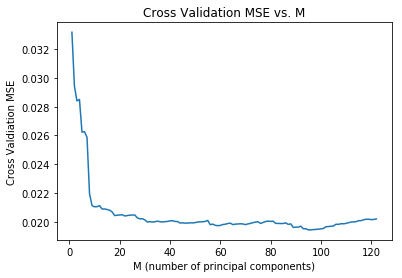

In [17]:
plt.plot(range(1, 123), cv_mse)
plt.xlabel('M (number of principal components)')
plt.ylabel('Cross Valdiation MSE')
plt.title('Cross Validation MSE vs. M')
plt.show()

In [18]:
m_best = np.argmin(cv_mse) + 1
print("M chosen by corss validation: " + str(m_best))

M chosen by corss validation: 96


In [19]:
lr.fit(reduced_train_x[:,:m_best], train_y)
reduced_test_x = pca.transform(scale(test_x))
y_pred_pcr = lr.predict(reduced_test_x[:,:m_best])
test_error = np.mean((test_y - y_pred_pcr) ** 2)
print("PCR")
print("Test MSE: " + str(test_error))

PCR
Test MSE: 0.0187739249643


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [22]:
from xgboost import XGBRegressor 

alphas = np.logspace(-2, 3, 10)
cv_mse = [] 
for a in alphas:
    xgb = XGBRegressor(reg_alpha=a, n_jobs=1)
    score = cross_val_score(xgb, train_x, train_y, cv=kfold10, scoring='neg_mean_squared_error')
    cv_mse.append(-1 * score.mean())

best_alpha = alphas[np.argmin(cv_mse)]

In [23]:
xgb = XGBRegressor(reg_alpha=best_alpha, n_jobs=1)
xgb.fit(train_x, train_y)
y_pred_xgb = xgb.predict(test_x)
test_error = np.mean((test_y - y_pred_xgb) ** 2)
print("XGBoost")
print("Test MSE: " + str(test_error))
print('λ: ' + str(best_alpha))

XGBoost
Test MSE: 0.0166028054122
λ: 0.035938136638


2.Tree Based Methods

Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [24]:
train_df = pd.read_csv('aps_failure_training_set.csv', header=14)
test_df = pd.read_csv('aps_failure_test_set.csv', header=14)

(b) Data Preparation

This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [25]:
# Mean Imputation 
aps_df = train_df.append(test_df)
aps_df = aps_df.replace('na', np.NaN)
imp = SimpleImputer(missing_values=np.NaN)
imputed_aps_x = imp.fit_transform(aps_df.iloc[:,1:])
imputed_aps_df_x = pd.DataFrame(imputed_aps_x, columns=aps_df.columns[1:])
imputed_aps_df_x.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample variance and m is sample mean

In [27]:
aps_features = imputed_aps_df_x
aps_features_stats = aps_features.describe()
aps_cv = aps_features_stats.loc['std'] * aps_features_stats.loc['std'] / aps_features_stats.loc['mean'] # var = std^2
aps_cv = pd.DataFrame(aps_cv)
aps_cv.columns = ['Coefficient of Variation']
aps_cv

,Coefficient of Variation
aa_000,1.145941e+06
ab_000,3.442691e+00
ac_000,1.674811e+09
ad_000,6.436987e+09
ae_000,3.348321e+03
af_000,3.592978e+03
ag_000,1.676613e+06
ag_001,2.133743e+06
ag_002,3.012695e+06
ag_003,7.175411e+06


iii. Plot a correlation matrix for your features using pandas or any other tool.

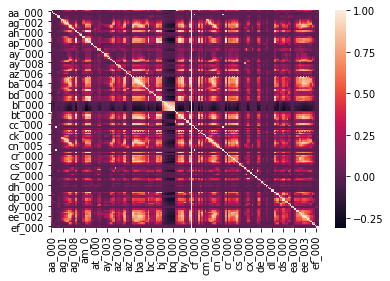

In [28]:
ax = sns.heatmap(aps_features.corr())

iv. Pick floor(√170) features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [31]:
aps_selected13 = aps_cv.nlargest(int(np.floor(np.sqrt(170))), 'Coefficient of Variation')
aps_selected13

,Coefficient of Variation
cf_000,6.454076e+09
co_000,6.441802e+09
ad_000,6.436987e+09
dq_000,1.954608e+09
ac_000,1.674811e+09
eb_000,2.047568e+08
df_000,8.681834e+07
dh_000,5.460524e+07
dl_000,4.050748e+07
cs_009,3.798682e+07


In [32]:
aps_top13 = dict() 
for i in xrange(len(aps_selected13)):
    aps_top13[aps_selected13.index[i]] = aps_features[aps_selected13.index[i]]

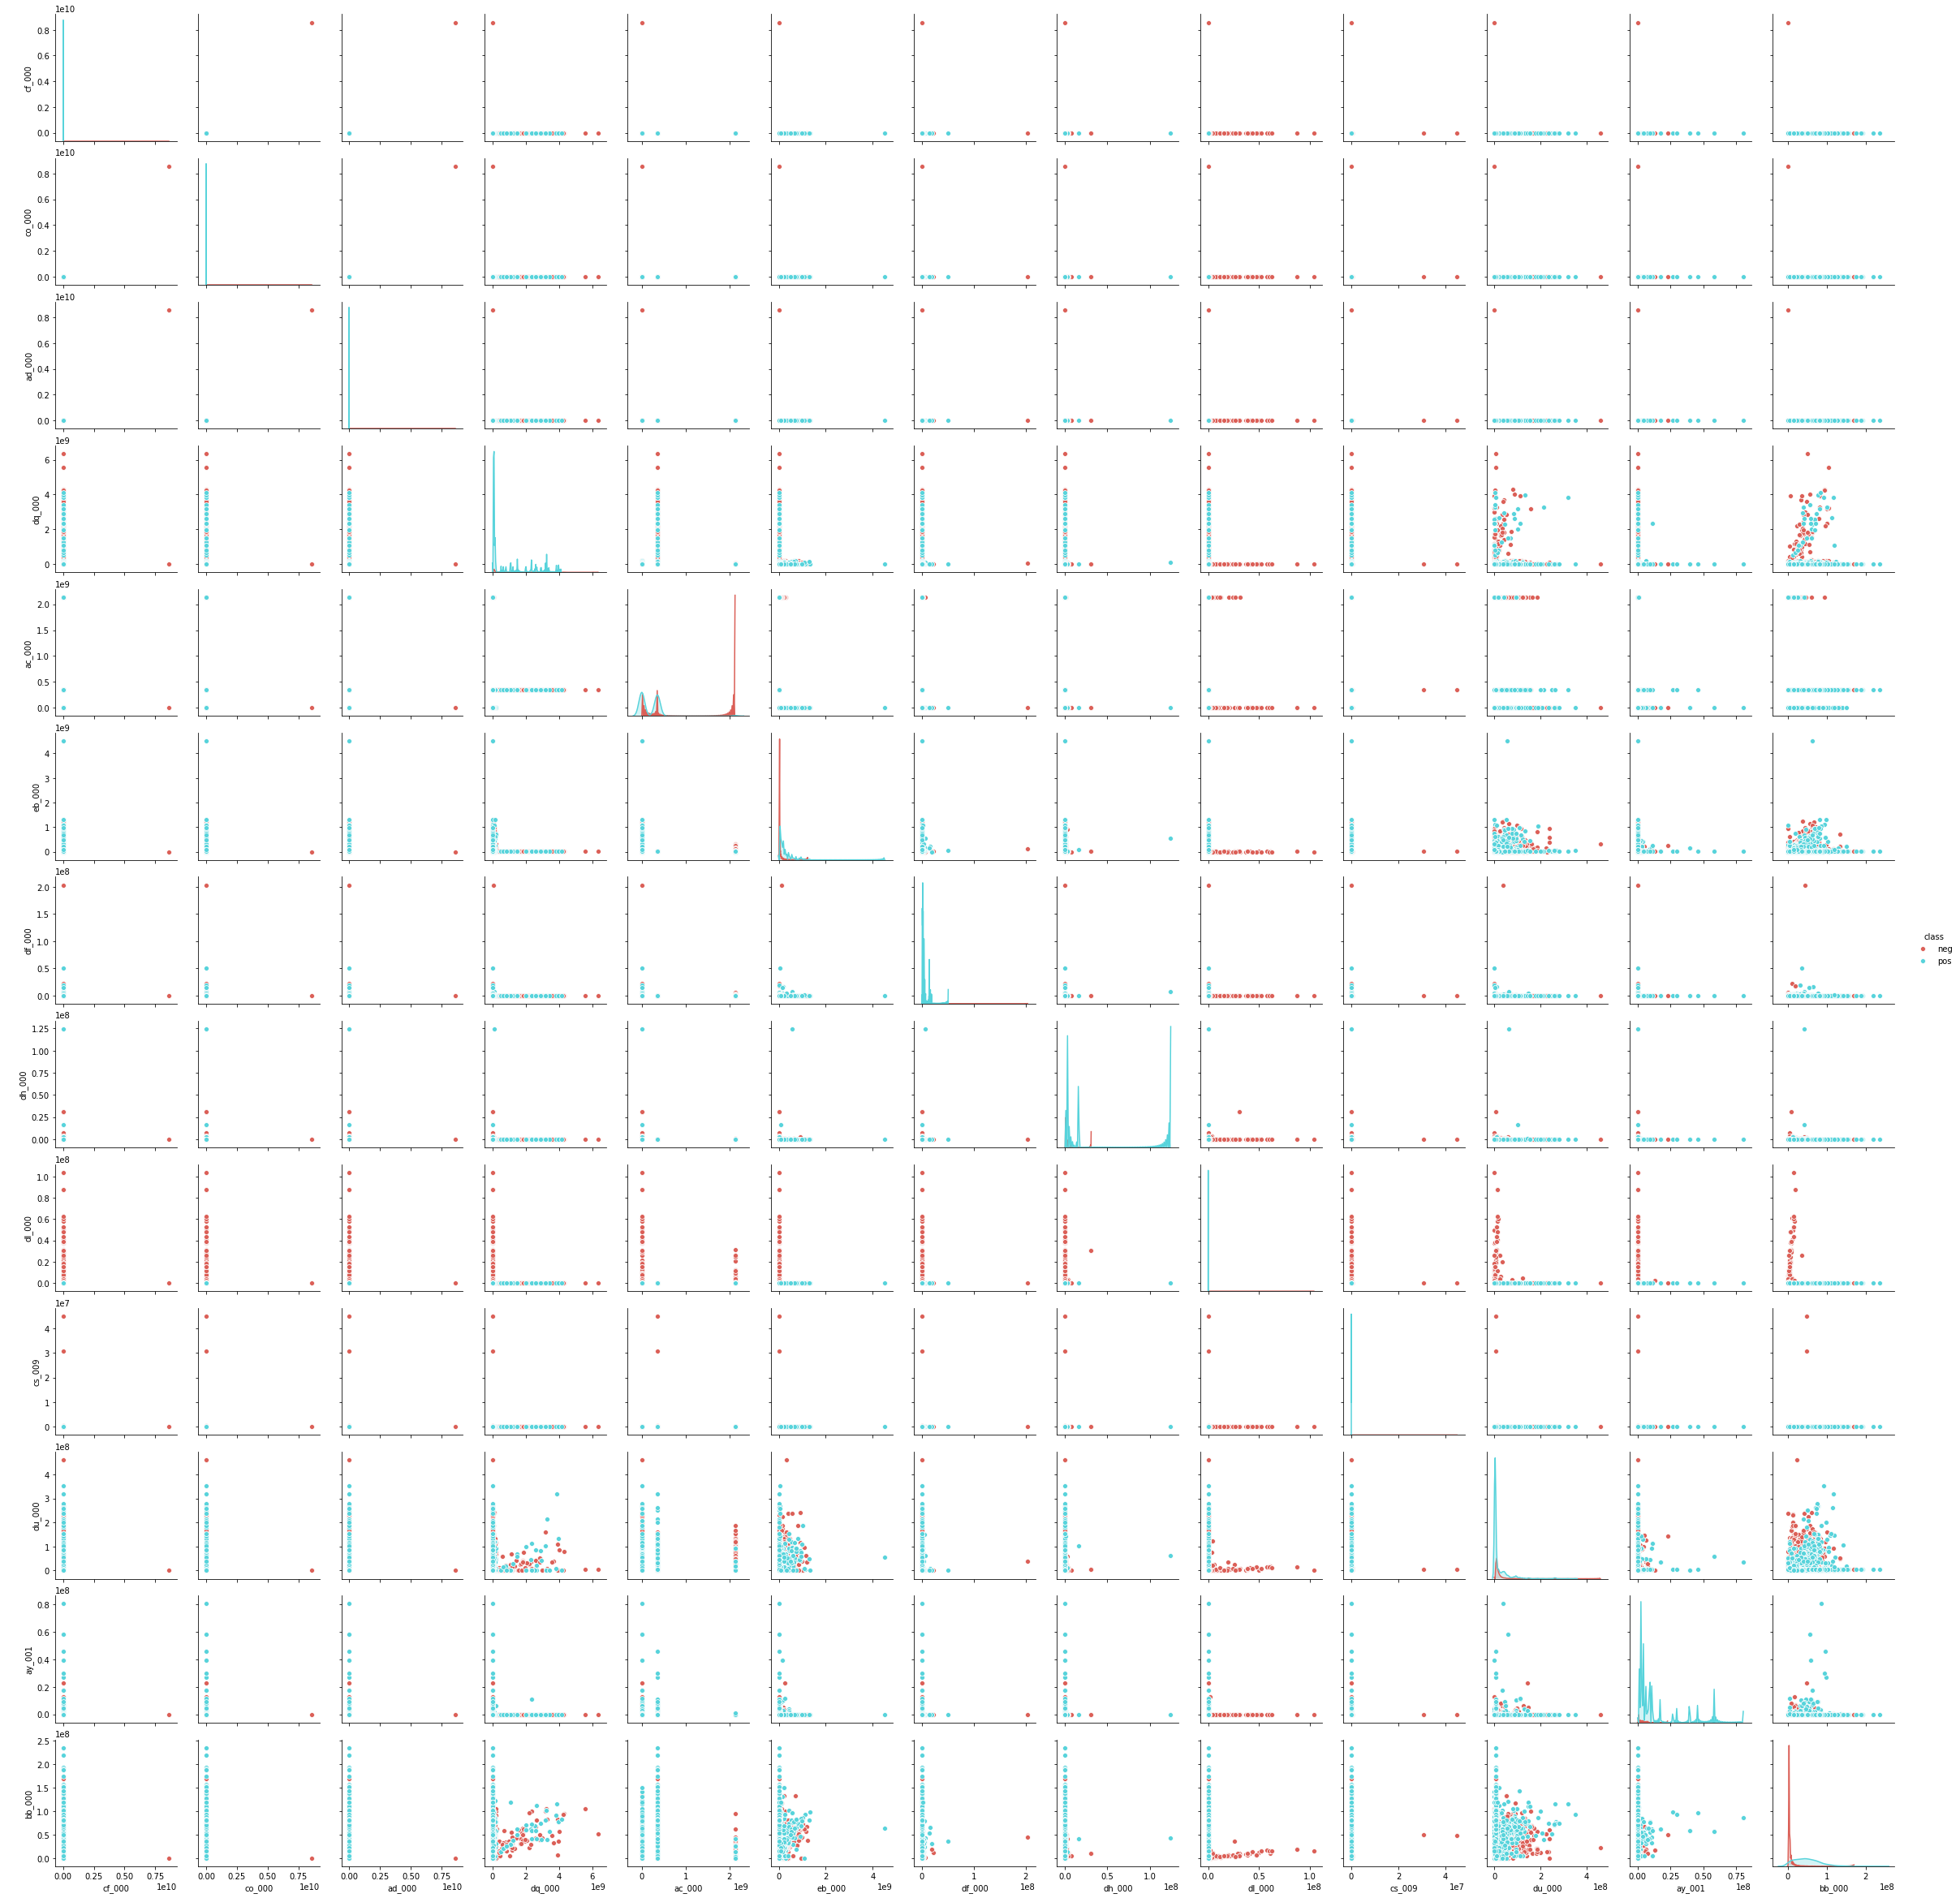

In [33]:
features_highest13 = aps_selected13.index.values
imputed_aps_df_x['class'] = aps_df['class'].values

sns.pairplot(imputed_aps_df_x, vars=features_highest13, hue='class', palette='hls')

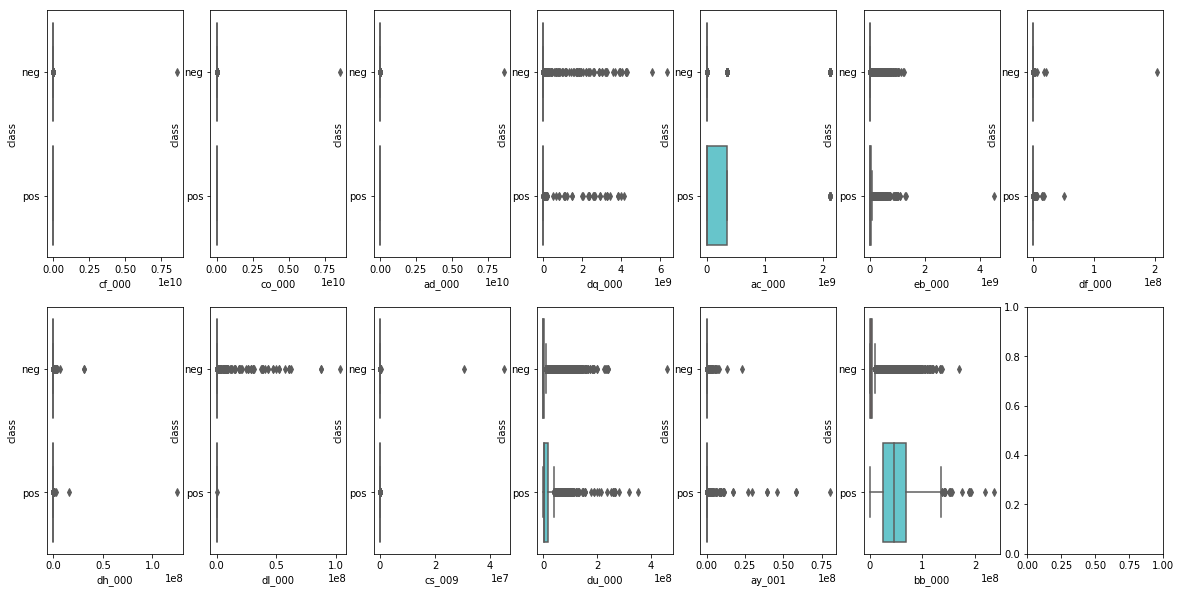

In [37]:
fig, axs = plt.subplots(2, 7, figsize=(20,10))
for i, ft in enumerate(features_highest13):
    sns.boxplot(x=ft, y='class', data=imputed_aps_df_x, palette='hls', ax=axs[i//7, i%7])

- By examining the pair plot, the scatter plots, there seems to be correlation between some of the features 

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [34]:
neg_count = 0 
pos_count = 0 
for i in range(len(imputed_aps_df_x)):
    if (imputed_aps_df_x.iloc[i]['class'] == 'neg'):
        neg_count = neg_count + 1 
    else: 
        pos_count = pos_count + 1 
print("Number of Positive (+) Data: " + str(pos_count))
print("Number of Negative (-) Data: " + str(neg_count))

Number of Positive (+) Data: 1375
Number of Negative (-) Data: 74625


In [36]:
pos_percentage = pos_count/len(imputed_aps_df_x)
neg_percentage = neg_count/len(imputed_aps_df_x)
print("Heavily Imbalanced Dataset as the percentage of positive class in the data set is " + str(100 * pos_percentage) + "%.")
print("However, the percentage of the negative class in the data set is " + str(100 * neg_percentage) +  "%.")

Heavily Imbalanced Dataset as the percentage of positive class in the data set is 1.80921052632%.
However, the percentage of the negative class in the data set is 98.1907894737%.


(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

- i) training

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

imputed_aps_df_x['class'] = imputed_aps_df_x['class'].replace('neg', 0).replace('pos', 1)
X_train = imputed_aps_df_x.iloc[:60000,:-1]
X_test = imputed_aps_df_x.iloc[60000:,:-1]
y_train = imputed_aps_df_x.iloc[:60000,-1]
y_test = imputed_aps_df_x.iloc[60000:,-1]

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
print('Confusion matrix:')
print(confusion_matrix(y_train, train_pred))

Confusion matrix:
[[59000     0]
 [    0  1000]]


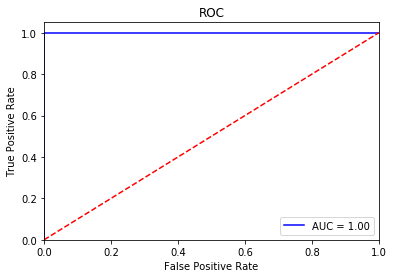

In [39]:
fpr, tpr, threshold = metrics.roc_curve(y_train, train_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
print('Train Misclassificatio rate: ' + str(1 - accuracy_score(y_train, train_pred)))

Train Misclassificatio rate: 0.0


- ii) test

In [43]:
test_pred = rf.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, test_pred))

Confusion matrix:
[[15608    17]
 [  100   275]]


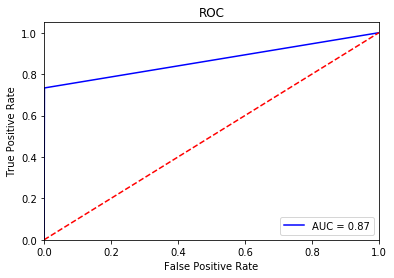

In [44]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
print('Out of Bag Error: ' + str(1 - rf.oob_score_))
print('Test Misclassification Rate: ' + str(1 - accuracy_score(y_test, test_pred)))

Out of Bag Error: 0.00601666666667
Test Misclassification Rate: 0.0073125


- When comparing out of bag error and test misclassification rate, out of bag error yields better result than misclassification rate

(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [47]:
rf_imbalance = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight='balanced_subsample')
rf_imbalance.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

- i) train

In [48]:
train_pred = rf_imbalance.predict(X_train)
print('Confusion matrix:')
print(confusion_matrix(y_train, train_pred))

Confusion matrix:
[[59000     0]
 [    1   999]]


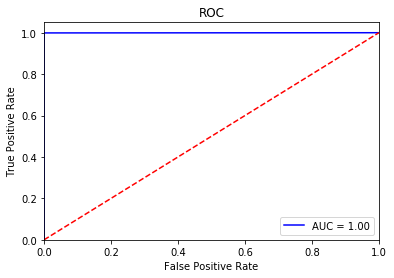

In [49]:
fpr, tpr, threshold = metrics.roc_curve(y_train, train_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
print('The misclassification rate for training set is: ' + str(1 - accuracy_score(y_train, train_pred))) 

The misclassification rate for training set is: 1.66666666667e-05


- ii) test

In [52]:
test_pred = rf_imbalance.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, test_pred))

Confusion matrix:
[[15612    13]
 [  159   216]]


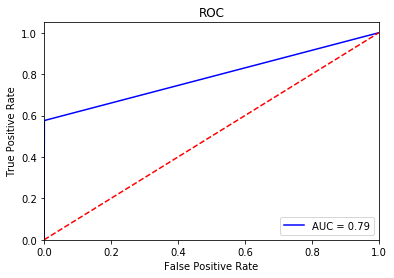

In [53]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
print('The Out of Bag error estimate is ' + str(1 - rf.oob_score_))
print('The test error is ' +  str(1 - accuracy_score(y_test, test_pred)))

The Out of Bag error estimate is 0.00601666666667
The test error is 0.01075


- When comparing out of bag error and test misclassification rate, out of bag error yields better result than misclassification rate

(e) Model Trees

In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ΣjβjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.

One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets

In [55]:
import weka.core.jvm as jvm
jvm.start(packages=True)
import weka.core.converters as converters
from weka.classifiers import Evaluation, PredictionOutput
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc
from weka.core.converters import Loader

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/choi/anaconda2/lib/python2.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/choi/anaconda2/lib/python2.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/choi/anaconda2/lib/python2.7/site-packages/javabridge/jars/cpython.jar', '/Users/choi/anaconda2/lib/python2.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/choi/anaconda2/lib/python2.7/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Launching VM in non-python thread
DEBUG:javabridge.jutil:Attaching to VM in monitor thread
DEBUG:javabridge.jutil:Signalling caller


In [58]:
imputed_aps_df_x['class'] = imputed_aps_df_x['class'].replace(0, 'neg').replace(1, 'pos')
newTrainPath = 'new_aps_train.csv'
imputed_aps_df_x.head(60000).to_csv(newTrainPath, index=False)
loader = Loader(classname="weka.core.converters.CSVLoader")
train_data = loader.load_file(newTrainPath)
train_data.class_is_last()

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.